# KNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm

In [ ]:
# Carregando o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1)
imagens, etiquetas = mnist['data'], mnist['target']

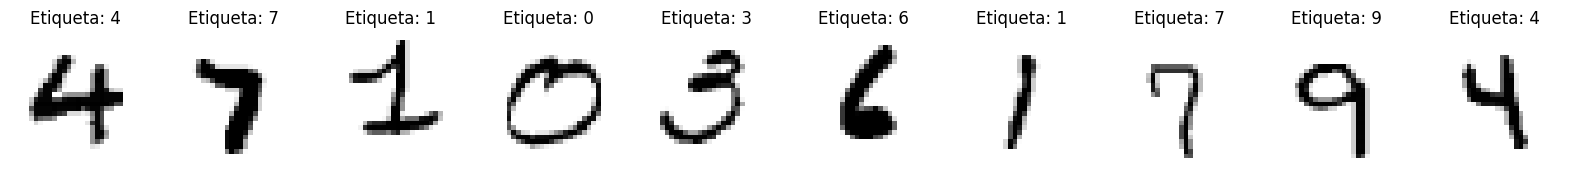

In [ ]:
# Pré processamento
# Convertendo etiquetas para inteiros
etiquetas = etiquetas.astype(int)

# 10% = 7000 amostras
tamanho_amostra = int(0.1 * len(imagens))
np.random.seed(1996)
amostra_indices = np.random.choice(len(imagens), tamanho_amostra, replace=False)

imagens_amostra = imagens.iloc[amostra_indices]
etiquetas_amostra = etiquetas.iloc[amostra_indices]

# Dividindo os dados em conjunto de treinamento e teste
imagens_treinamento, imagens_teste, etiquetas_treinamento, etiquetas_teste = train_test_split(imagens_amostra, etiquetas_amostra, test_size=0.2, random_state=1996)

# Exibindo algumas imagens do conjunto de dados
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    axes[i].imshow(imagens_treinamento.iloc[i].values.reshape(28, 28), cmap='gray_r')
    axes[i].set_title(f"Etiqueta: {etiquetas_treinamento.iloc[i]}")
    axes[i].axis('off')
plt.show()

In [ ]:
# Calcular a distância por diferentes métodos
def calcular_distancia(ponto1, ponto2, selecao):
  if selecao == "euclidiana":
    distancia = np.sqrt(np.sum((ponto1 - ponto2) ** 2))
  elif selecao == "manhattan":
    distancia = np.sum(np.abs(ponto1 - ponto2))
  elif selecao == "chebyshev":
    distancia = np.max(np.abs(ponto1 - ponto2))
  else:
    raise ValueError(f"Distância inválida: {selecao}")
  return distancia


# Classificador KNN
def knn_classificar(pontos_treinamento, etiquetas_treinamento, novo_ponto, k, selecao="euclidiana"):
    distancias = []
    for row in pontos_treinamento.iterrows():
        indice, ponto_treinamento = row

        distancia = calcular_distancia(novo_ponto, ponto_treinamento, selecao)
        distancias.append((distancia, etiquetas_treinamento[indice]))

    distancias_ordenadas = sorted(distancias, key=lambda x: x[0])
    vizinhos_proximos = distancias_ordenadas[:k]

    etiquetas = [etiqueta for (distancia, etiqueta) in vizinhos_proximos]
    etiqueta_mais_comum = Counter(etiquetas).most_common(1)[0][0]

    return etiqueta_mais_comum


# Visualização gráfica das previsões
def visualizar_previsoes(imagens, etiquetas_verdadeiras, etiquetas_previstas, num_imagens):
    linhas = num_imagens // 10
    fig, axes = plt.subplots(linhas, 10, figsize=(7 * linhas, 3 * linhas))
    for i in range(num_imagens):
        ax = axes[i // 10, i % 10]
        ax.imshow(imagens.iloc[i].values.reshape(28, 28), cmap='gray_r')
        ax.set_title(f"Pred: {etiquetas_previstas[i]}\nVerdade: {etiquetas_verdadeiras.iloc[i]}")
        ax.axis('off')
    plt.show()

Classificando: 100%|██████████| 1400/1400 [1:00:04<00:00,  2.57s/it]



Precisão do modelo KNN: 93.36%


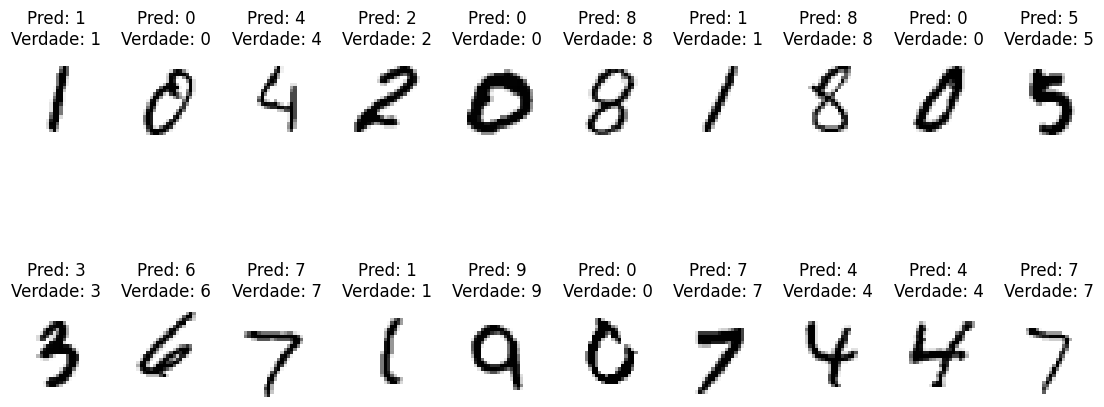

In [ ]:
# Classificando as imagens de teste
k = 5
previsoes = []

for i in tqdm(range(len(imagens_teste)), desc="Classificando"):
    previsao = knn_classificar(imagens_treinamento, etiquetas_treinamento, imagens_teste.iloc[i].values, k)
    previsoes.append(previsao)

# Calculando a precisão
precisao = np.sum(previsoes == etiquetas_teste) / len(etiquetas_teste)
print(f"\nPrecisão do modelo KNN: {precisao * 100:.2f}%")

# Visualizar resultados
visualizar_previsoes(imagens_teste, etiquetas_teste, previsoes, 20)

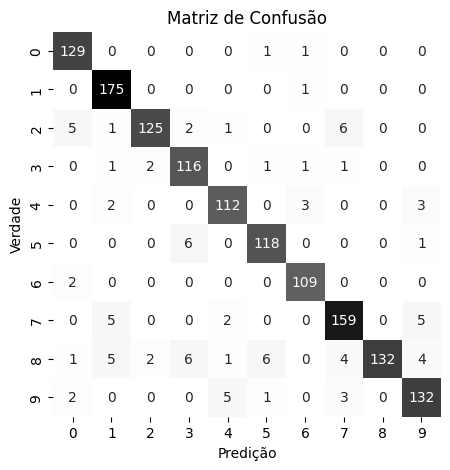


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       131
           1       0.93      0.99      0.96       176
           2       0.97      0.89      0.93       140
           3       0.89      0.95      0.92       122
           4       0.93      0.93      0.93       120
           5       0.93      0.94      0.94       125
           6       0.95      0.98      0.96       111
           7       0.92      0.93      0.92       171
           8       1.00      0.82      0.90       161
           9       0.91      0.92      0.92       143

    accuracy                           0.93      1400
   macro avg       0.93      0.94      0.93      1400
weighted avg       0.94      0.93      0.93      1400



In [ ]:
matriz_confusao = confusion_matrix(etiquetas_teste, previsoes)

plt.figure(figsize=(5, 5))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='gray_r', cbar=False)
plt.xlabel('Predição')
plt.ylabel('Verdade')
plt.title('Matriz de Confusão')
plt.show()

# Calculando e imprimindo as métricas de classificação
relatorio_classificacao = classification_report(etiquetas_teste, previsoes)
print("\nRelatório de Classificação:")
print(relatorio_classificacao)